##### THE SPARKS FOUNDATION May'21¶

### Task 3: Exploratory Data Analysis - Retail

####  Author: Tushar Suresh Patil

### Aim

Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can
work to make more profit.

● What all business problems you can derive by exploring the data?

importing libraries

In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

loading dataset

In [4]:
df = pd.read_csv('SampleSuperstore.csv')

In [5]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


#### Any missing Values?

In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Exploratory Data Analysis

### 1.State and Cities

#### State wise Dealing 

In [13]:
states=df['State'].value_counts().reset_index()

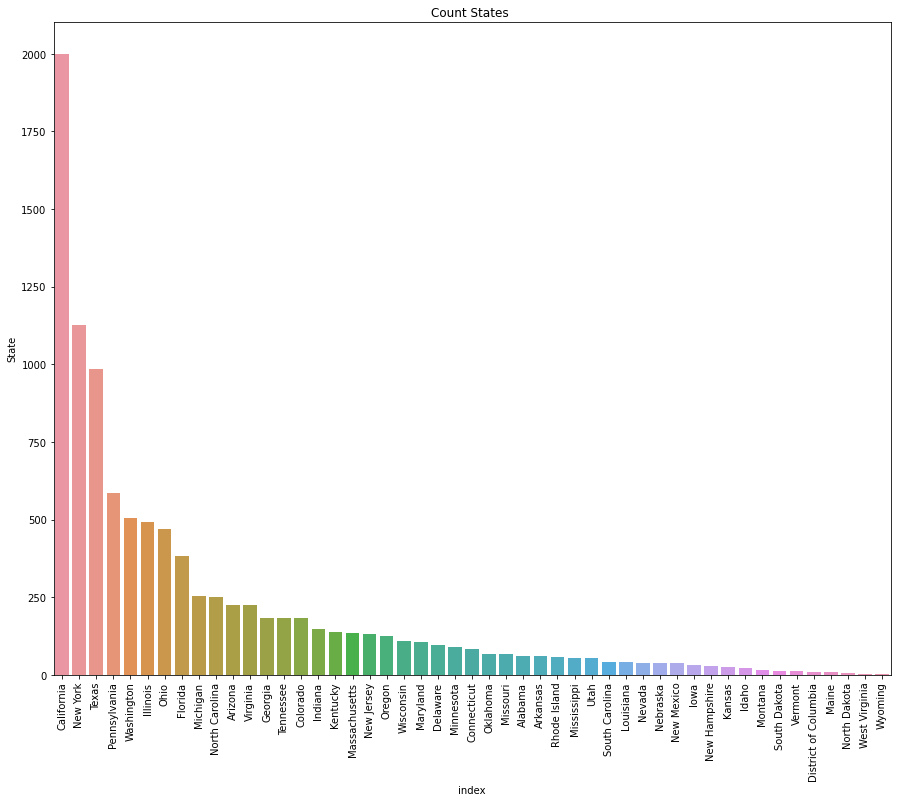

In [14]:
plt.figure(figsize=(15,12))
sns.barplot(x='index' , y = 'State', data = states)
plt.title('Count States ')
plt.xticks(rotation=90)
plt.show()

#### Higest Profitable States 

In [158]:
sorted_city=df.groupby('State').mean()['Profit'].sort_values(ascending= False).reset_index()

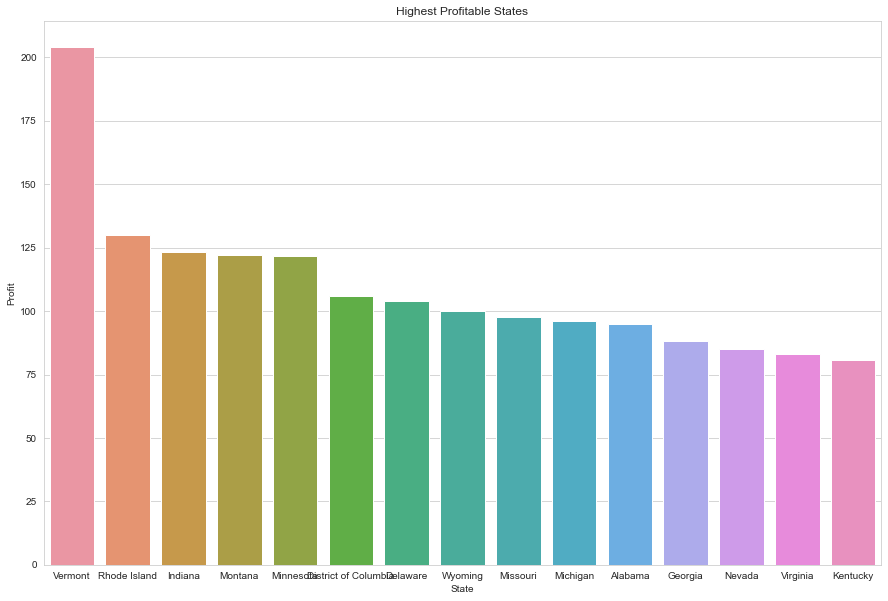

In [159]:
plt.figure(figsize=(15,10))
plt.title('Highest Profitable States')
sns.barplot(x = sorted_city['State'][:15],y = sorted_city['Profit'][:15])
plt.show()

In [160]:
sorted_city.shape

(49, 2)

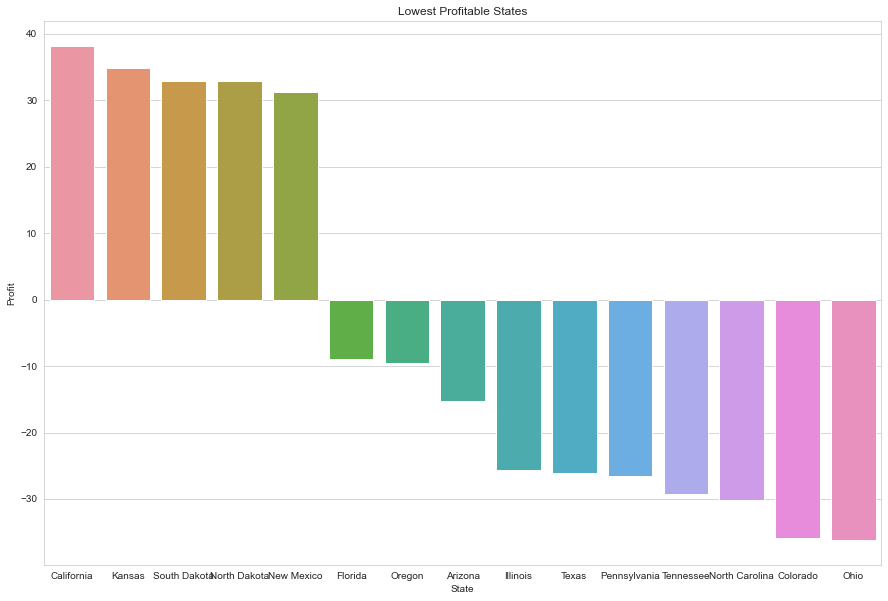

In [161]:
plt.figure(figsize=(15,10))
plt.title('Lowest Profitable States')
sns.barplot(x = sorted_city['State'][34:],y = sorted_city['Profit'][34:])
plt.show()

#### City wise Dealing

In [10]:
City=df['City'].value_counts().reset_index()

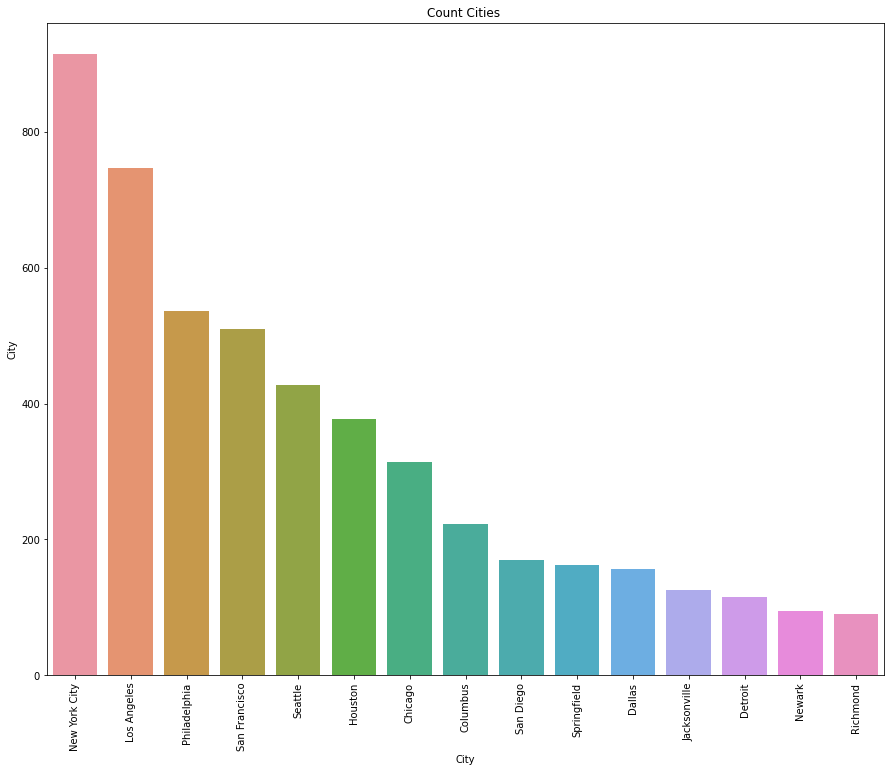

In [11]:

plt.figure(figsize=(15,12))
sns.barplot(x='index' , y = 'City', data = City[:15])
plt.title('Count Cities ')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.show()

#### High Profitable   Cities

In [205]:
Profit_city =df.groupby('City').mean()['Profit'].sort_values(ascending = False).reset_index()

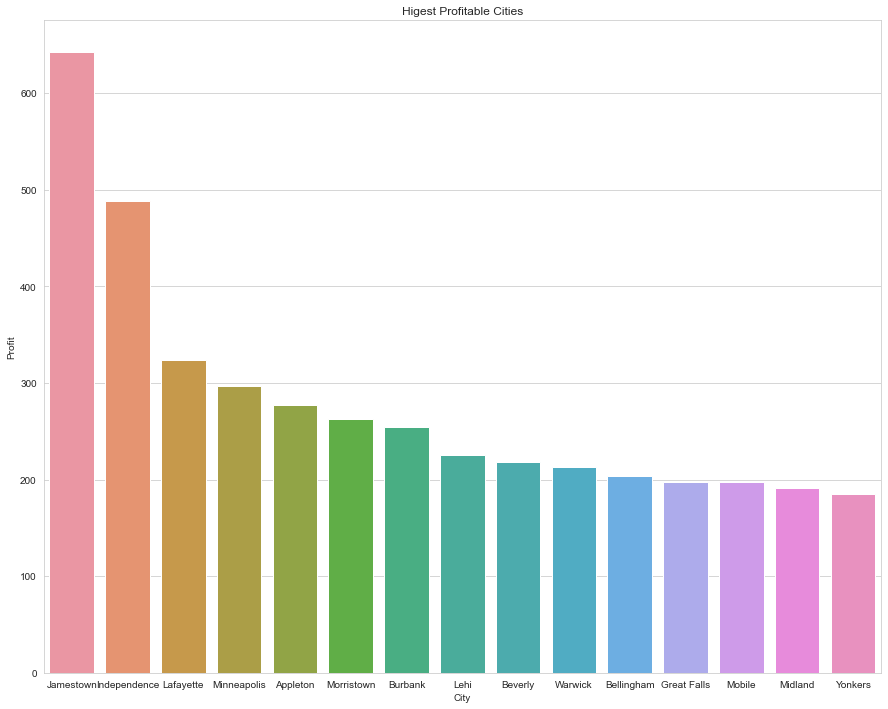

In [206]:
plt.figure(figsize=(15,12))
plt.title('Higest Profitable Cities')
sns.barplot( x = 'City', y ='Profit',data = Profit_city[:15])
plt.show()

#### Low Profitable Cities

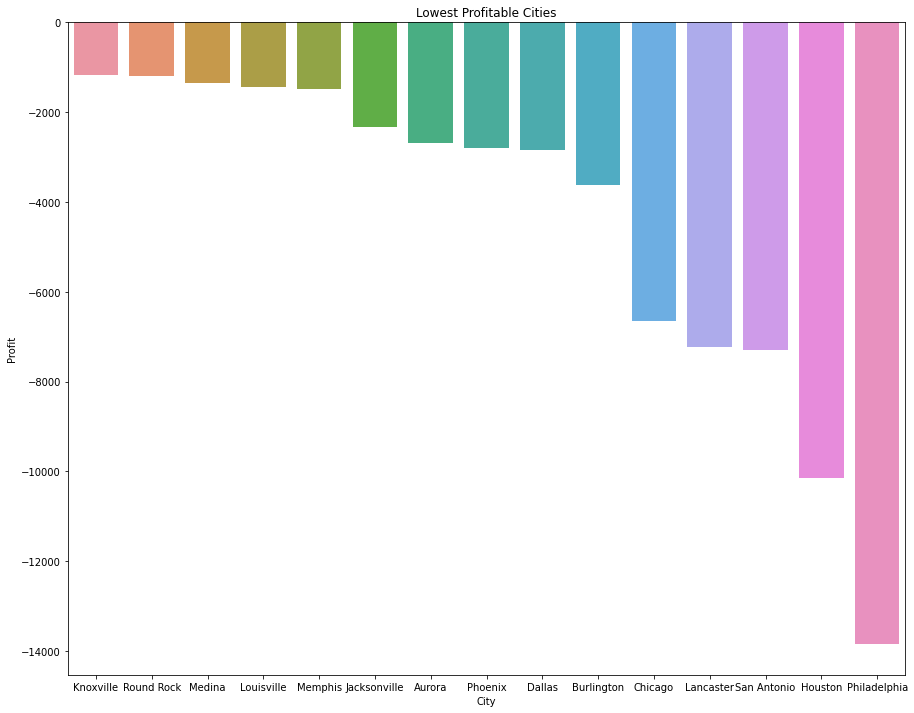

In [15]:
plt.figure(figsize=(15,12))
plt.title('Lowest Profitable Cities')
sns.barplot( x = 'City', y ='Profit',data = Profit_city.tail(15))
plt.show()

#### Sales with State

In [200]:
Profit_city =df.groupby('State').mean()['Sales'].sort_values(ascending = False).reset_index()

#### Highest Amount of Sales with States

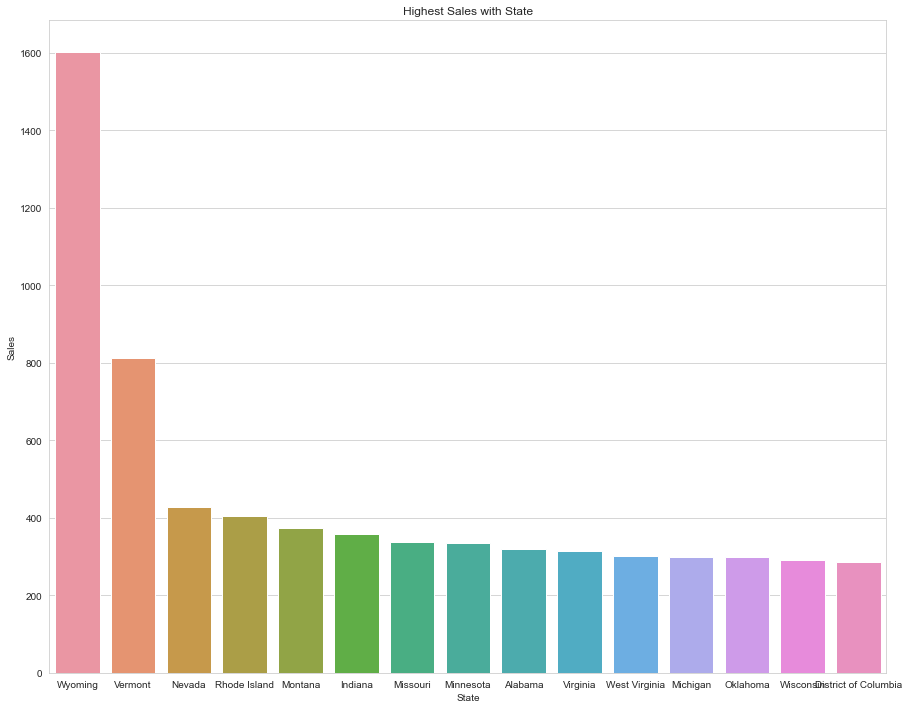

In [202]:
plt.figure(figsize=(15,12))
plt.title('Highest Sales with State')
sns.barplot( x = 'State', y ='Sales',data = Profit_city.head(15))
plt.show()

#### Lowest amount of Sales with State

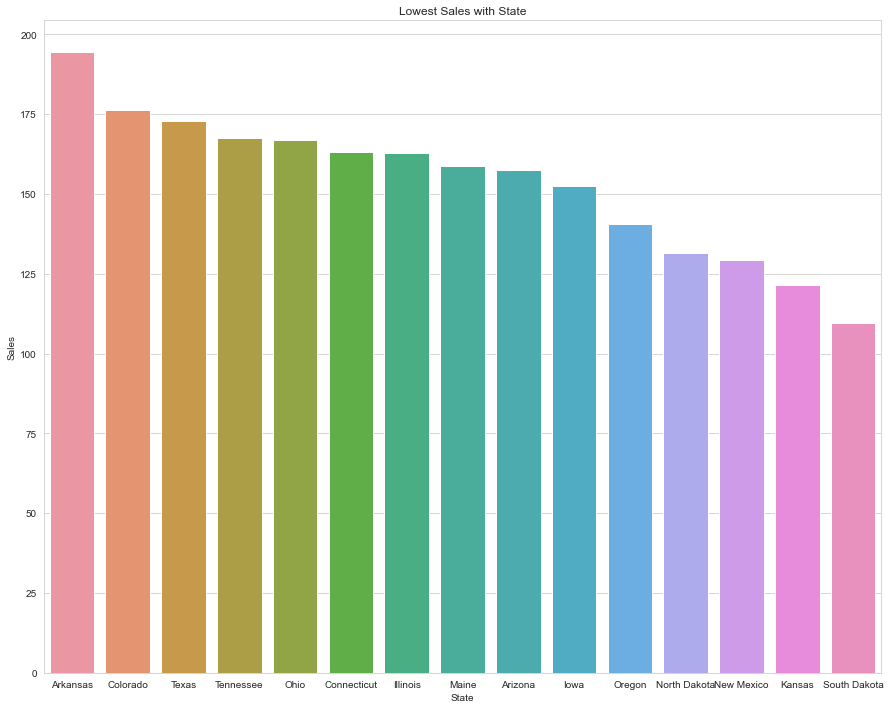

In [204]:
plt.figure(figsize=(15,12))
plt.title('Lowest Sales with State')
sns.barplot( x = 'State', y ='Sales',data = Profit_city.tail(15))
plt.show()

#### Histogram

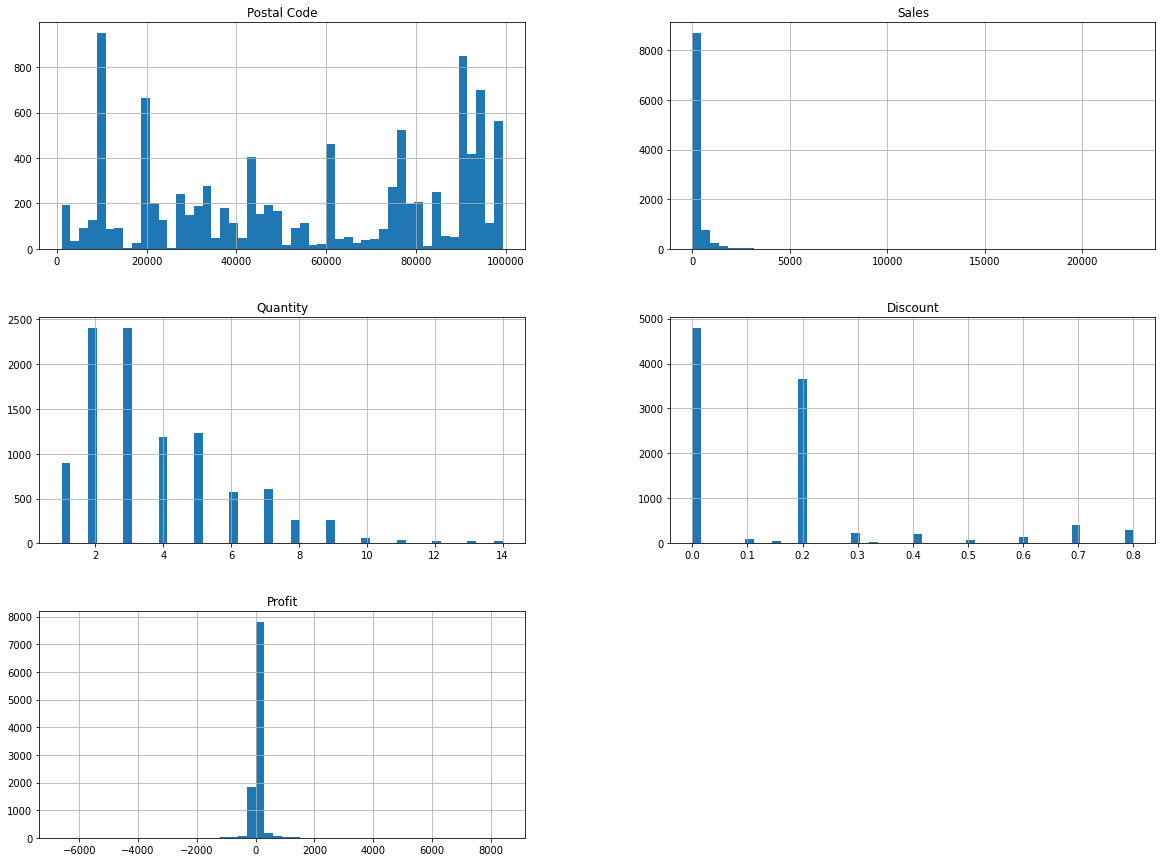

In [16]:
df.hist(bins=50 ,figsize=(20,15))
plt.show();

### 2.Category and Sub-Category

#### Count Categories

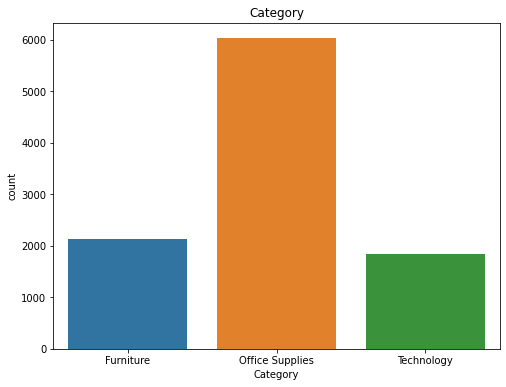

In [17]:
plt.figure(figsize=(8,6))
plt.title('Category')
sns.countplot(df['Category'])
plt.show()

#### Number of Sub-Category

Text(0.5, 1.0, 'Sub-Category')

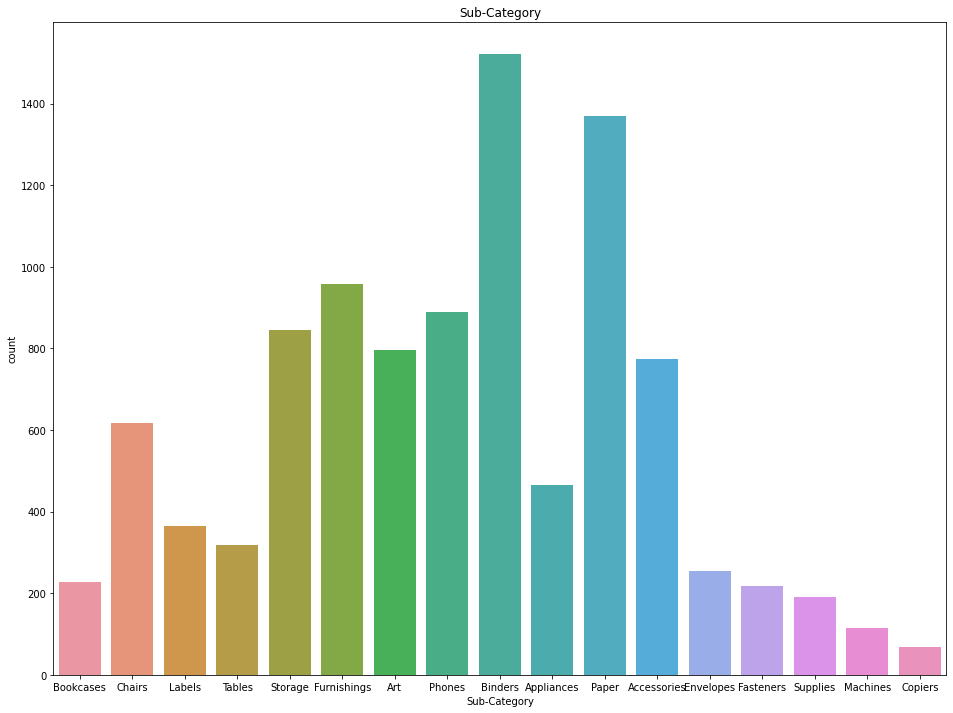

In [18]:
plt.figure(figsize=(16,12))
sns.countplot(df['Sub-Category'])
plt.title('Sub-Category')

#### Profit According to Category

In [19]:
df[df['Category']=='Technology']['Profit'].sum()

145454.9481

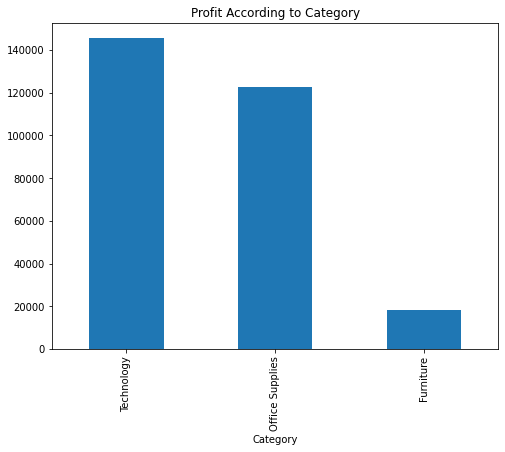

In [20]:
plt.figure(figsize=(8,6))
plt.title('Profit According to Category')
df.groupby('Category').sum()['Profit'].sort_values(ascending= False).plot(kind = 'bar')
# plt.xticks(rotation=90)
plt.show()

#### Profit according to sub-category

In [21]:
sub_category_pro=df.groupby('Sub-Category').mean()['Profit'].sort_values(ascending = False).reset_index()

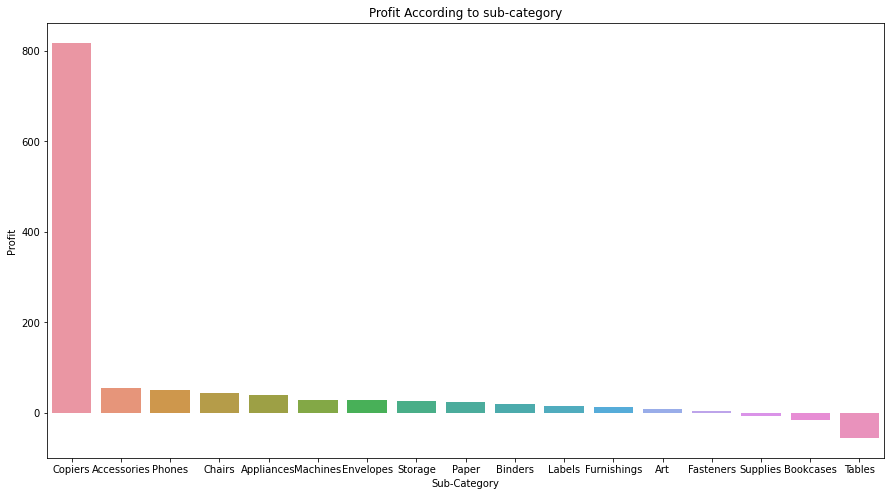

In [47]:
plt.figure(figsize=(15,8))
sns.barplot(x ='Sub-Category', y ='Profit',data=sub_category_pro)
plt.title('Profit According to sub-category')
plt.show()

#### Which Sub-Category Suffering from highest loss

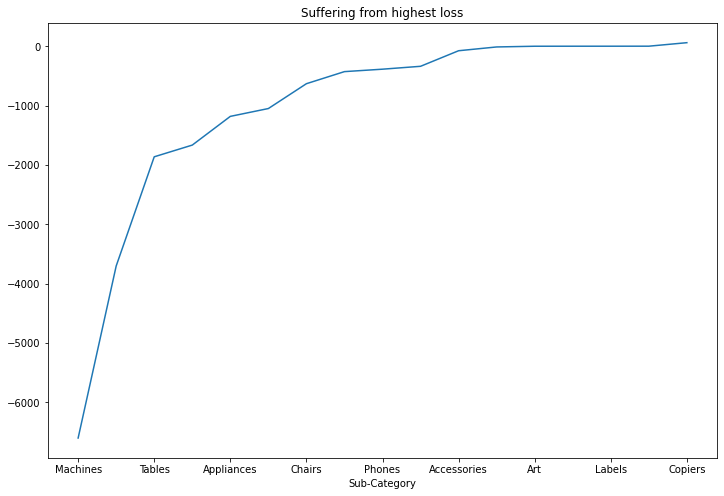

In [61]:
plt.figure(figsize=(12,8))
plt.title('Suffering from highest loss')
df.groupby('Sub-Category')['Profit'].min().sort_values().plot()
plt.show()

#### Which Sub-Category  has gain highest amount of profit with no loss

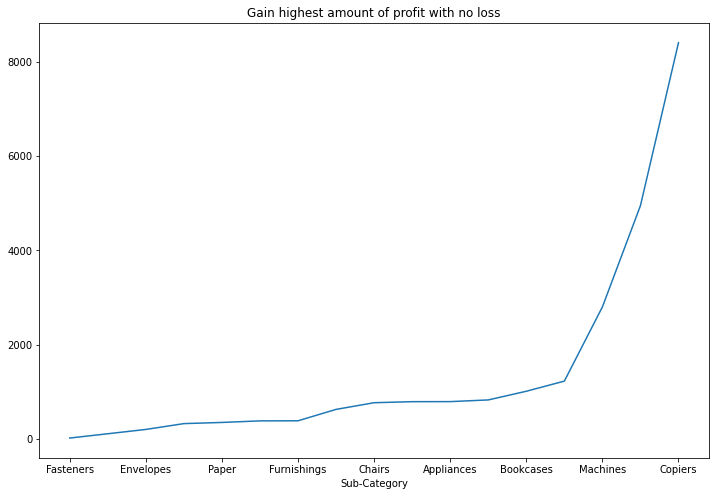

In [62]:
plt.figure(figsize=(12,8))
plt.title('Gain highest amount of profit with no loss')
df.groupby('Sub-Category')['Profit'].max().sort_values().plot()
plt.show()

 Above Bar Plot Shows "Copiers" Sub-category has gain highest amount of profit with no loss and "Machines" Sub-Category has lowest amount of profit

### 3.Ship Mode	

#### Count Ship Mode

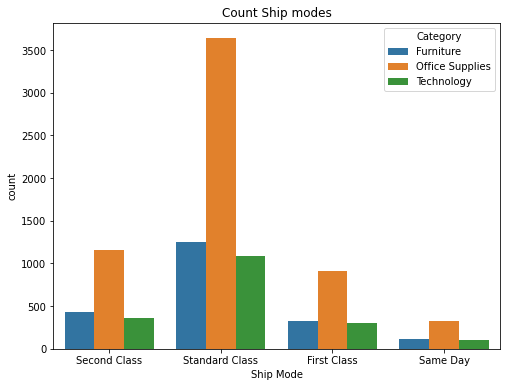

In [15]:
plt.figure(figsize = (8,6))
sns.countplot('Ship Mode',data = df, hue='Category')
plt.title('Count Ship modes')
plt.show()

#### Profit According to Ship Mode

In [24]:
ship_modes=df.groupby('Ship Mode').mean()['Profit'].sort_values(ascending = False).reset_index()

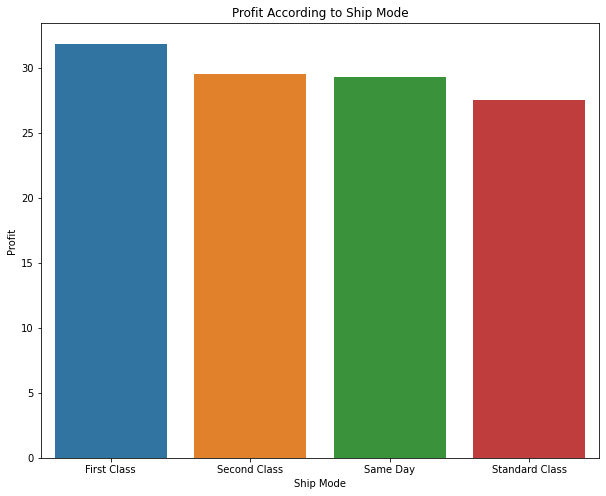

In [25]:
plt.figure(figsize=(10,8))
plt.title('Profit According to Ship Mode')
sns.barplot(x ='Ship Mode', y= 'Profit', data = ship_modes)
plt.show()

From above Figure we can say that "First Class" Ship-Mode has More Profit and "Standard" ship-mode has Less Profit

#### Discount Accourding to Ship Mode

In [26]:
ship_modes=df.groupby('Ship Mode').mean()['Discount'].sort_values(ascending = False).reset_index()

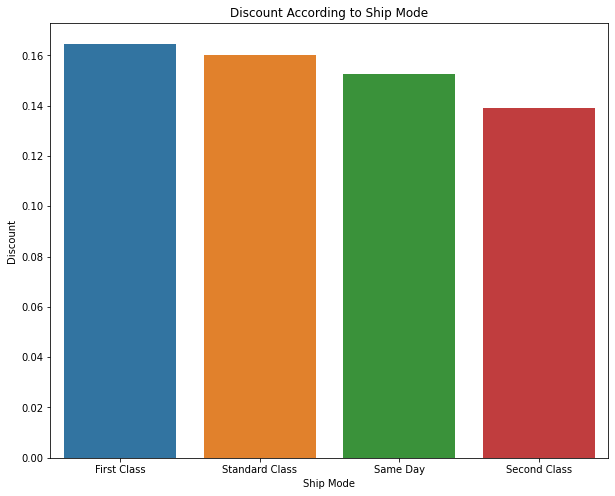

In [27]:
plt.figure(figsize=(10,8))
plt.title('Discount According to Ship Mode')
sns.barplot(x ='Ship Mode', y= 'Discount', data = ship_modes)
plt.show()

From above Figure we can say that "First Class" Ship-Mode has More Discount and "Second Class" ship-mode has Less Discount

### 4.Segment

#### Count Segments

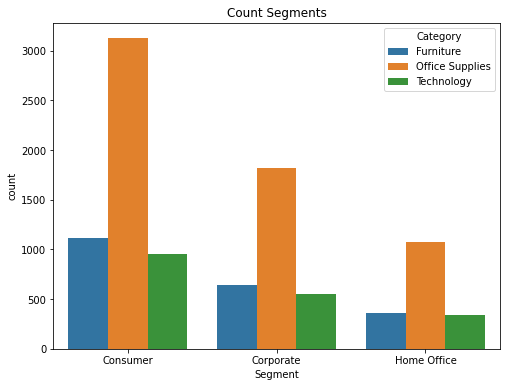

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(df['Segment'], hue=df['Category'])
plt.title('Count Segments')
plt.show()

In [29]:
segment= df.groupby('Segment').mean()['Profit'].sort_values(ascending= False).reset_index()

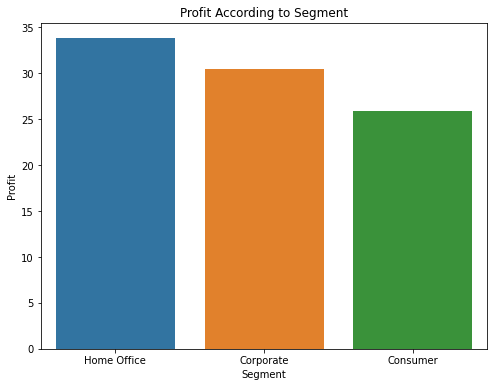

In [30]:
plt.figure(figsize=(8,6))
plt.title('Profit According to Segment')
sns.barplot(x ='Segment', y = 'Profit', data = segment)
plt.show()

From above Figure we can say that "Home Office" segment has More Profit  and "Consumer" segment has Less Profit 

#### Sales According to Segement

In [73]:
segment= df.groupby('Segment').mean()['Sales'].sort_values(ascending= False).reset_index()

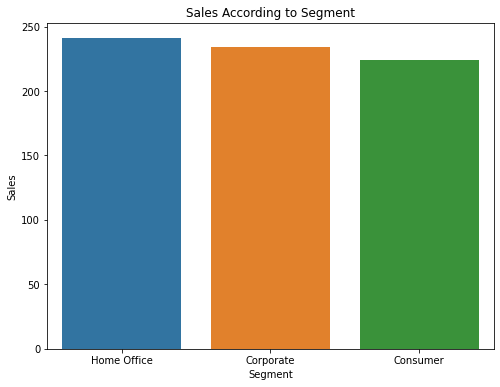

In [74]:
plt.figure(figsize=(8,6))
plt.title('Sales According to Segment')
sns.barplot(x ='Segment', y = 'Sales', data = segment)
plt.show()

From above Figure we can say that "Home Office" segment has More Profit and Sales and "Consumer" segment has Less Profit and Sales 

#### Discount According to Segment

In [75]:
segment= df.groupby('Segment').mean()['Discount'].sort_values(ascending= False).reset_index()

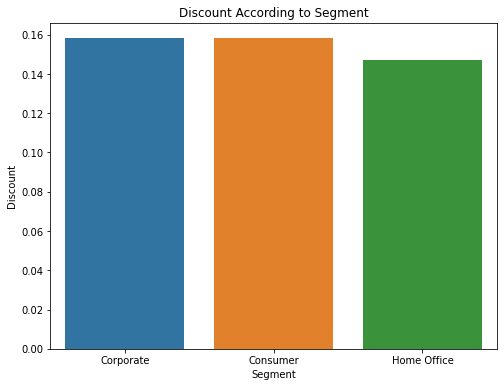

In [76]:
plt.figure(figsize=(8,6))
plt.title('Discount According to Segment')
sns.barplot(x ='Segment', y = 'Discount', data = segment)
plt.show()

### 5.Region

#### Count Regions

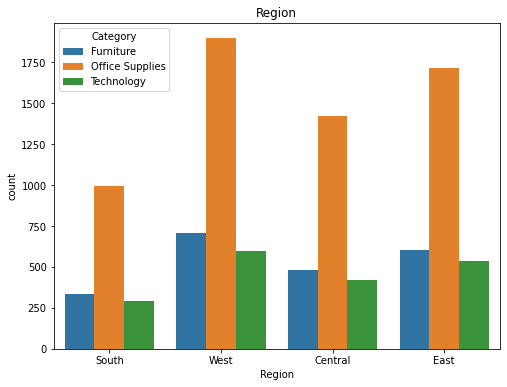

In [98]:
plt.figure(figsize=(8,6))
plt.title('Region')
sns.countplot(df['Region'], hue=df['Category'])
plt.show()

#### Region according to Profit

In [96]:
region=df.groupby('Region').mean()['Profit'].sort_values().reset_index()

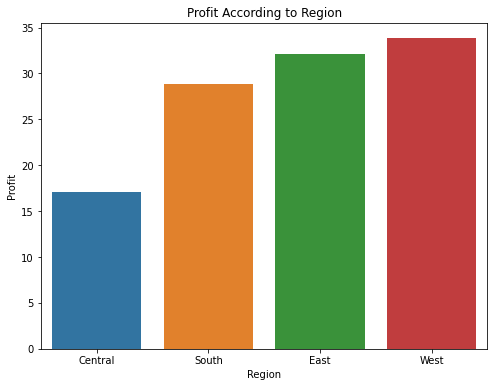

In [97]:
plt.figure(figsize=(8,6))
plt.title('Profit According to Region')
sns.barplot(x='Region', y ='Profit', data= region)
plt.show()

From above Figure we can say that "West" Region has More Profit and "Central" Region has Less Profit

In [93]:
region=df.groupby('Region').mean()['Discount'].sort_values().reset_index()

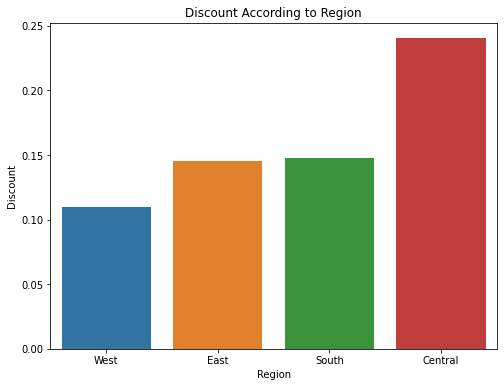

In [94]:
plt.figure(figsize=(8,6))
plt.title('Discount According to Region')
sns.barplot(x='Region', y ='Discount', data= region)
plt.show()

From above Figure we can say that "Central" Region has More Discount and "West" Region has Less Discount

### 6.Pairplot 

In [44]:
df = df.drop(['Postal Code'], axis =1)

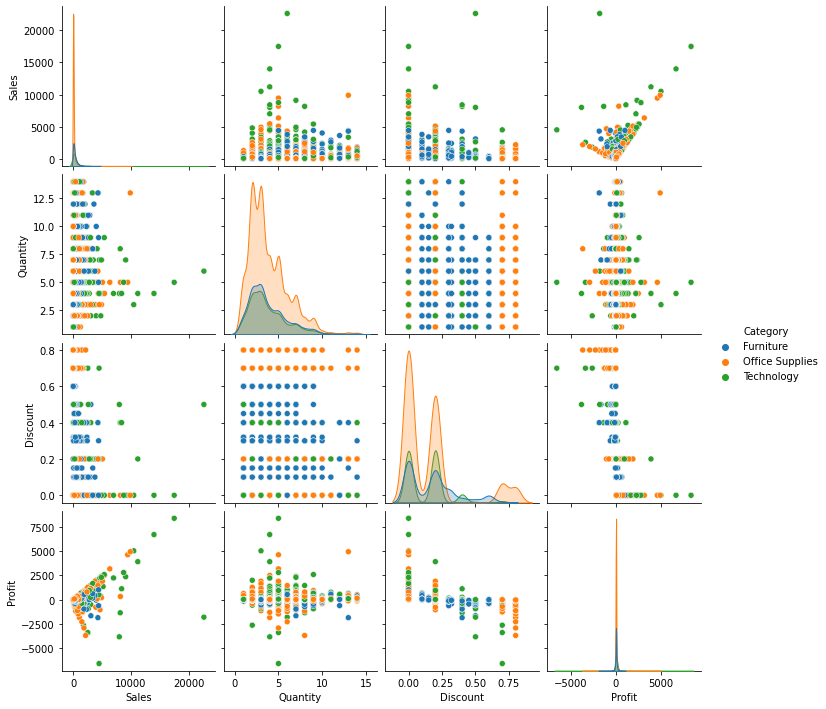

In [45]:
sns.pairplot(data = df, hue='Category')

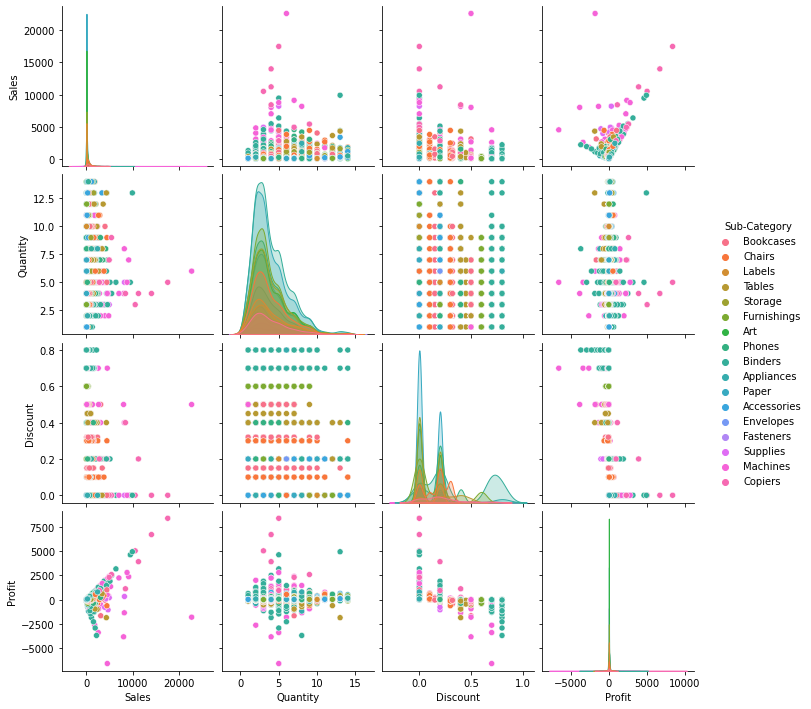

In [46]:
sns.pairplot(data = df, hue='Sub-Category')

### 7.Relationship Between Sales and Profit

In [36]:
sales_profit =df[['Sales', 'Profit']]

<AxesSubplot:title={'center':'Sales Vs Profit'}, xlabel='Sales', ylabel='Profit'>

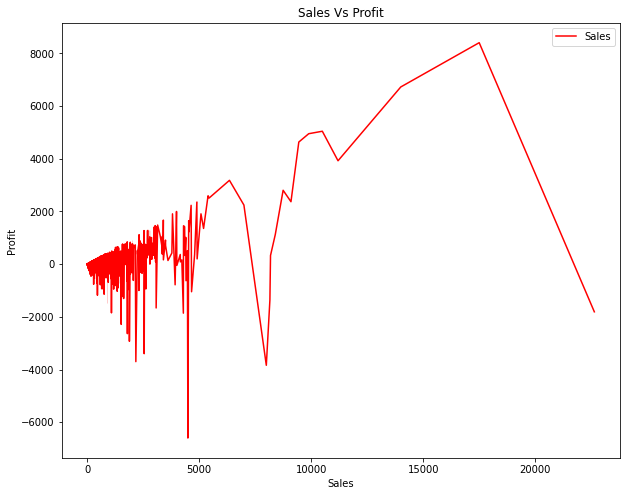

In [37]:
plt.figure(figsize=(10,8))
plt.title('Sales Vs Profit')
sns.lineplot('Sales','Profit', data=df , color='r',label='Sales')

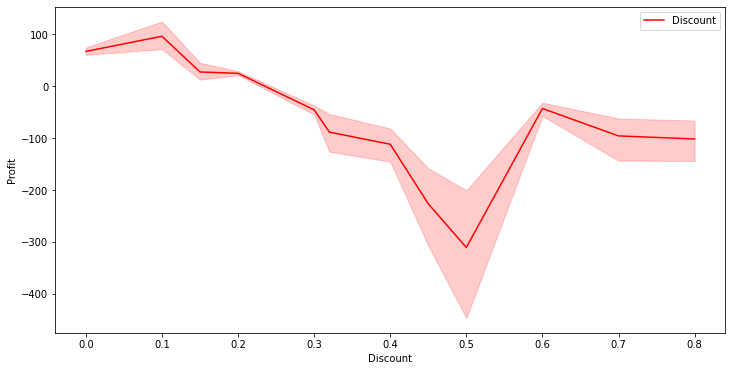

In [38]:
plt.figure(figsize=(12,6))
sns.lineplot('Discount','Profit', data=df , color='r',label='Discount')
plt.legend()
plt.show()

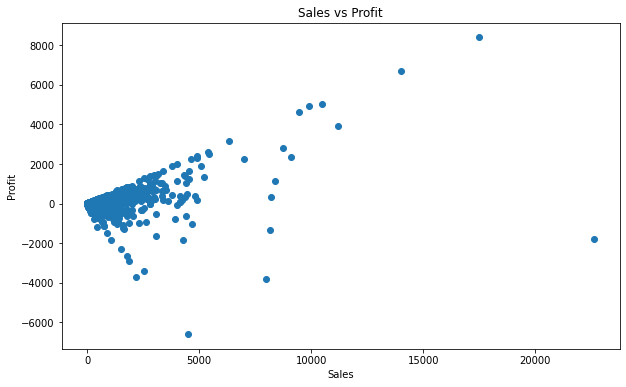

In [39]:
fig, ax = plt.subplots(figsize = (10 , 6))
ax.scatter(df["Sales"] , df["Profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
ax.set_title('Sales vs Profit')
plt.show()

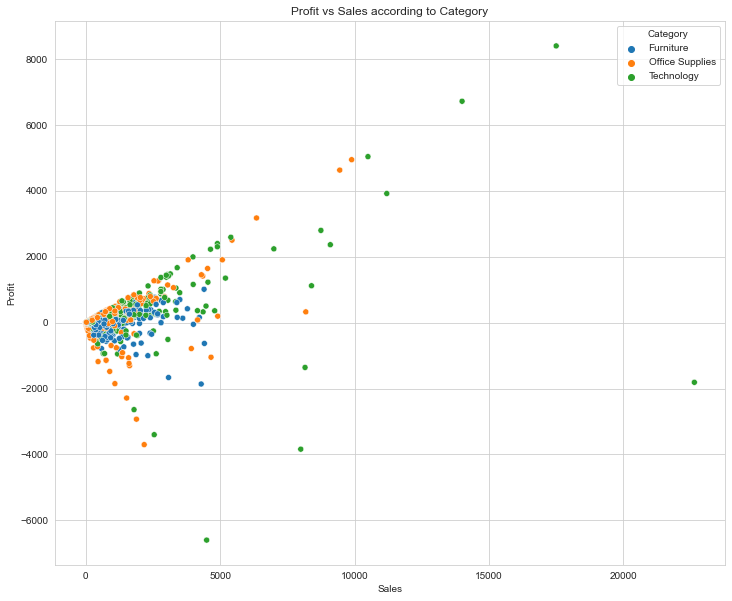

In [134]:
plt.figure(figsize= (12,10))
plt.title('Profit vs Sales according to Category')
sns.scatterplot(x= df['Sales'], y =df['Profit'], hue =df['Category'])
plt.show()

#### Profit is more than that of sale but there are some areas where profit could be increased.

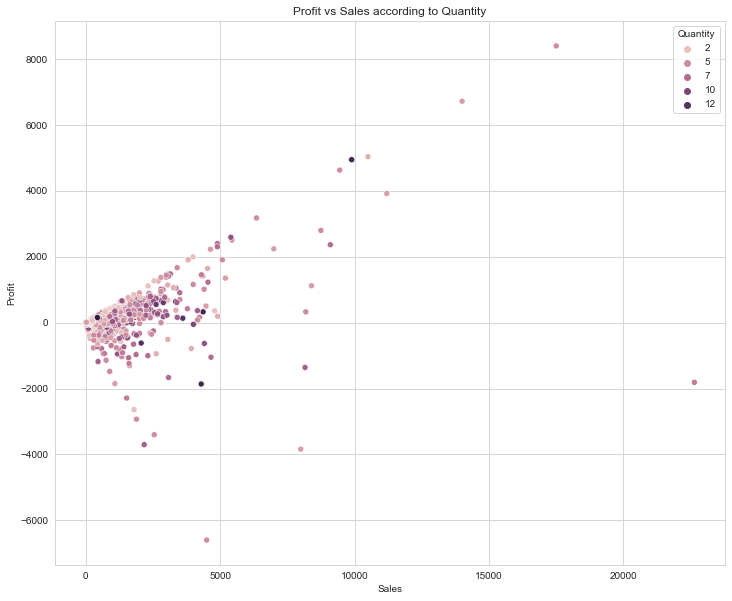

In [136]:
plt.figure(figsize= (12,10))
plt.title('Profit vs Sales according to Quantity')
sns.scatterplot(x= df['Sales'], y =df['Profit'], hue =df['Quantity'])
plt.show()

In [41]:
sorted_city.head()

,State,Profit
0,California,76381.3871
1,New York,74038.5486
2,Washington,33402.6517
3,Michigan,24463.1876
4,Virginia,18597.9504


### 8. Product categories and sub-categories for 5 Highest Profitable states

In [42]:
def state_data_viewer(states):
    product_data = df.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (32,8))
        fig.suptitle(state, fontsize=14)        
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()

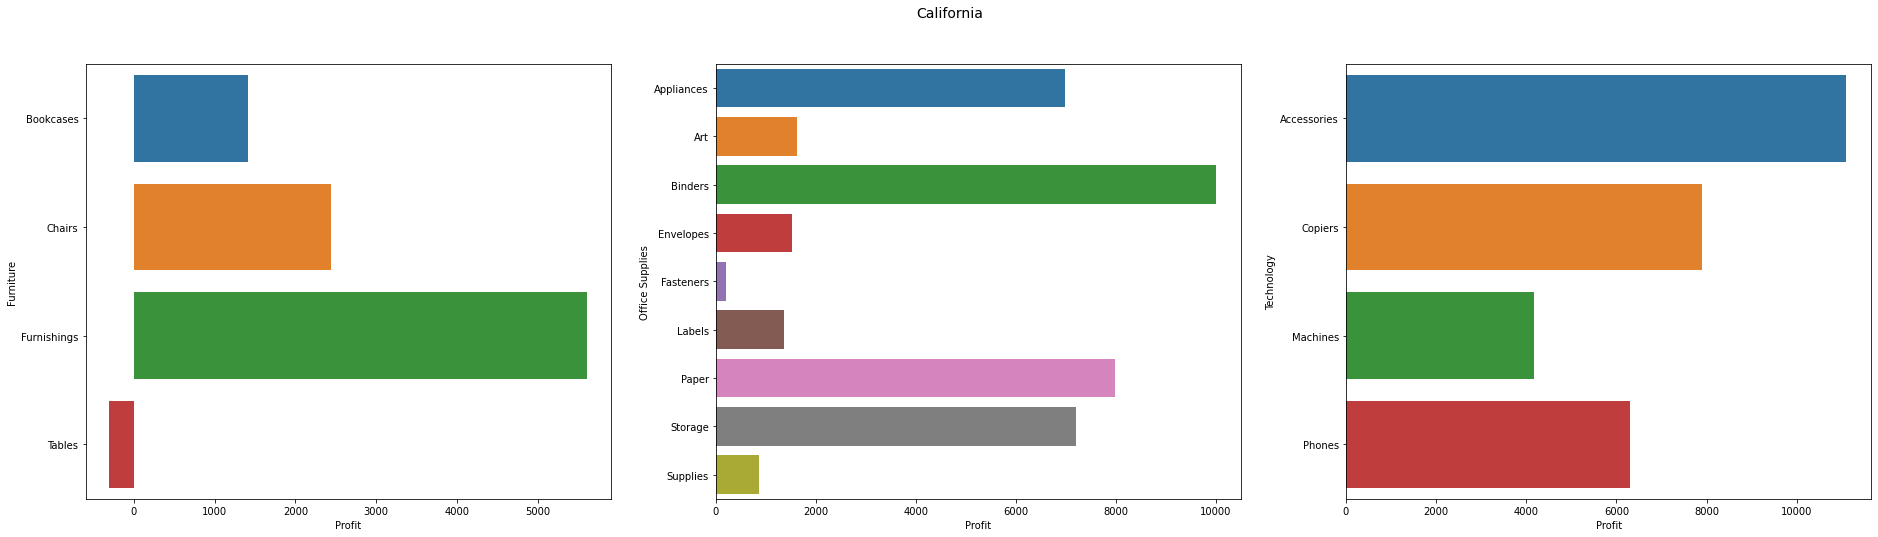

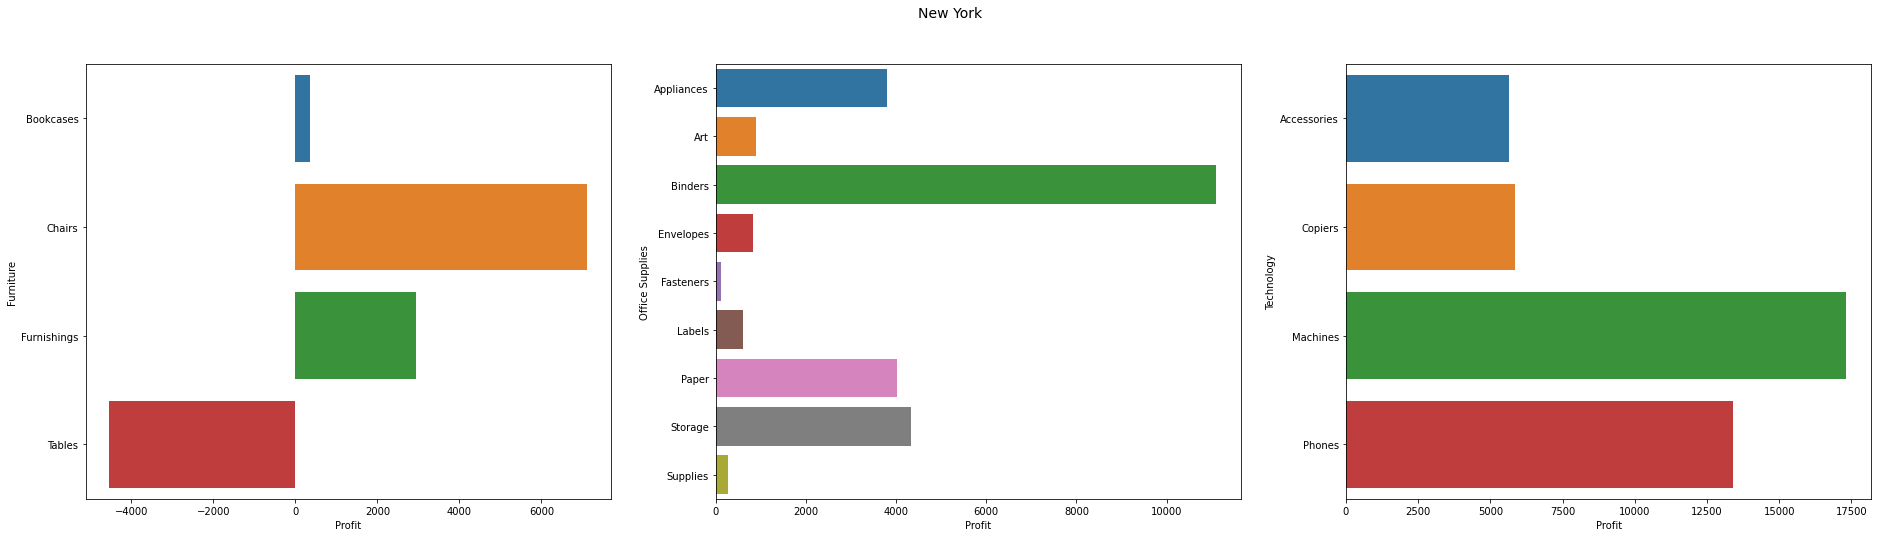

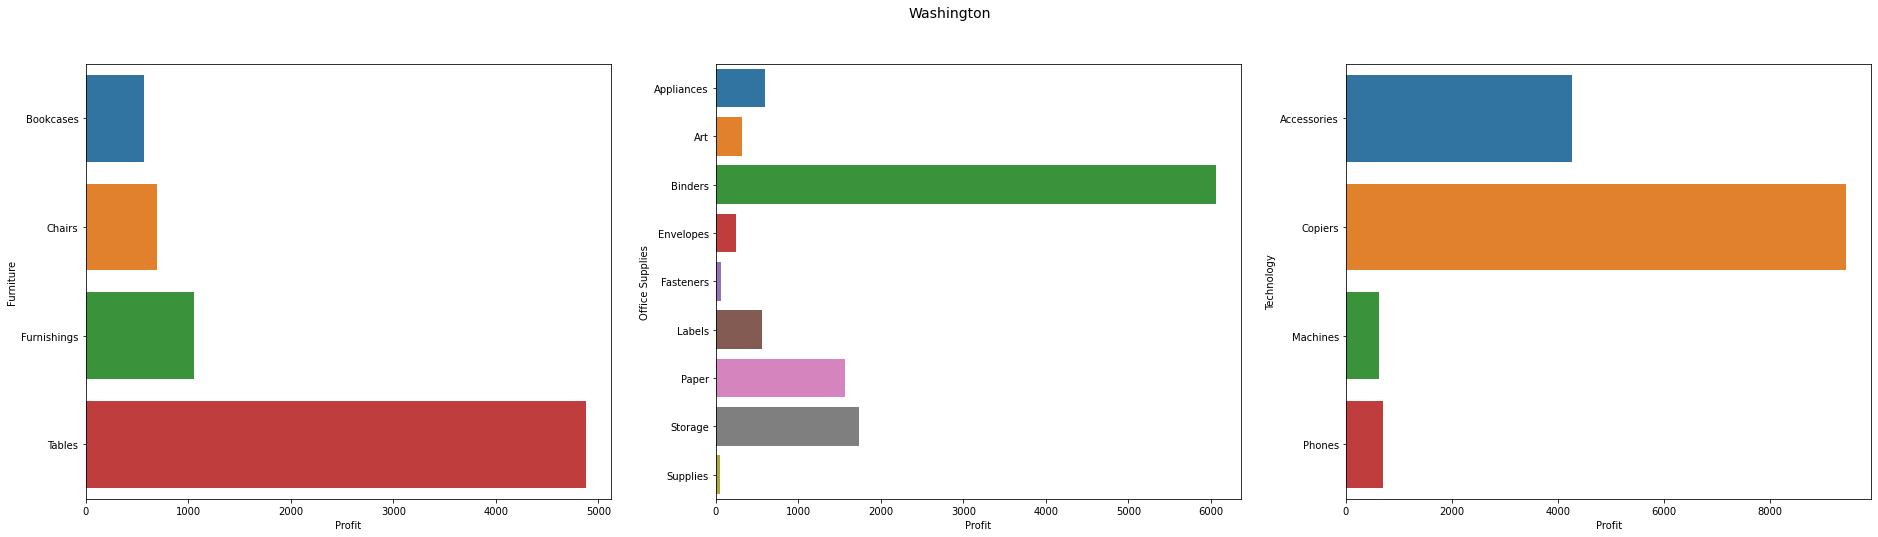

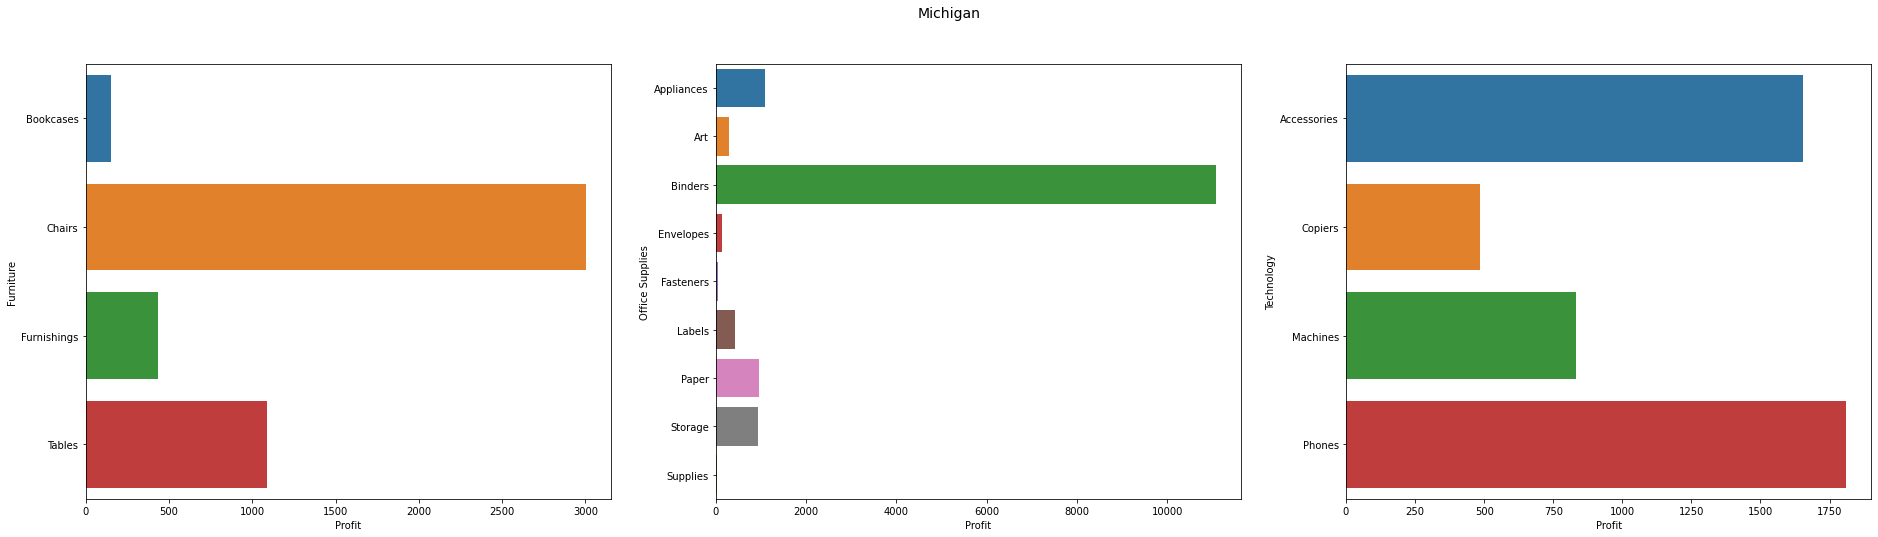

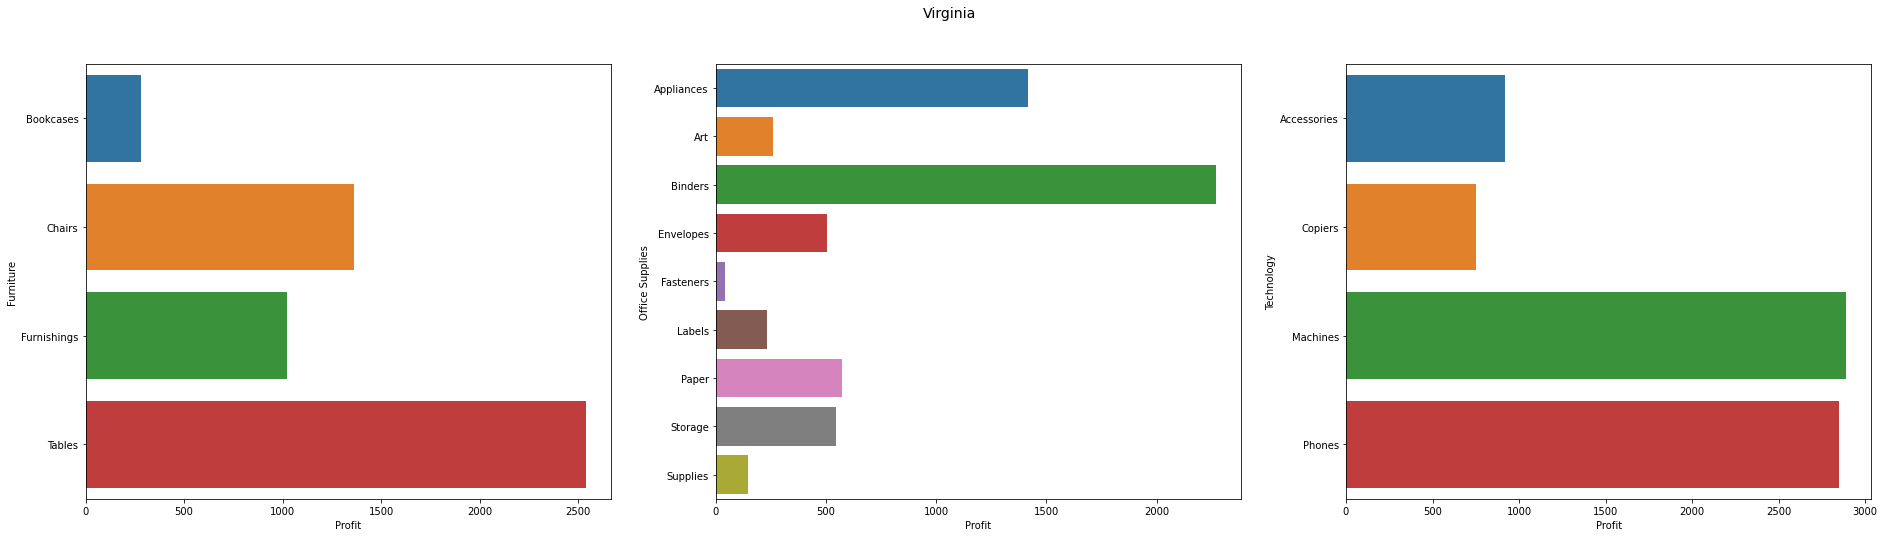

In [43]:
states = ['California', 'New York', 'Washington', 'Michigan', 'Virginia']
state_data_viewer(states)

### 9.Quantity

In [141]:
quantity = df.groupby('Sub-Category').sum()['Quantity'].sort_values(ascending=False)

<AxesSubplot:title={'center':'Sub-Category with Quantity'}, xlabel='Sub-Category'>

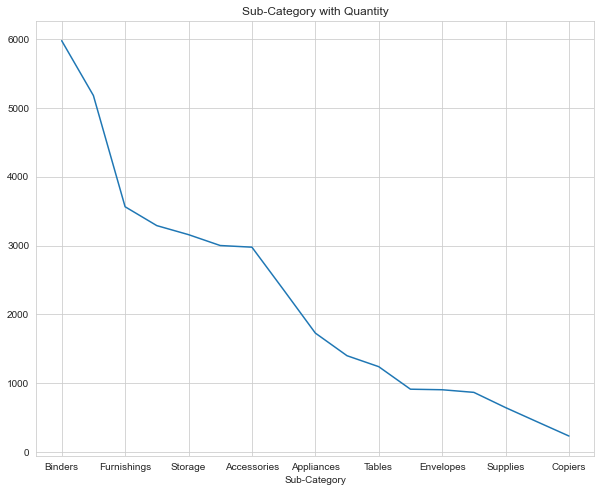

In [142]:
plt.figure(figsize=(10,8))
plt.title('Sub-Category with Quantity')
quantity.plot()

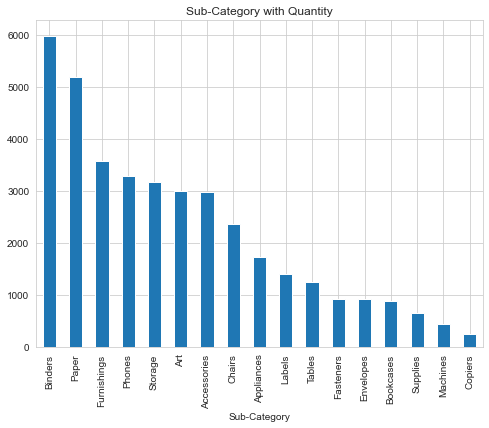

In [143]:
plt.figure(figsize=(8,6))
plt.title('Sub-Category with Quantity')
quantity.plot(kind = 'bar')
# sns.barplot(y='Quantity', x = 'Sub-Category', data = quantity)
plt.show()

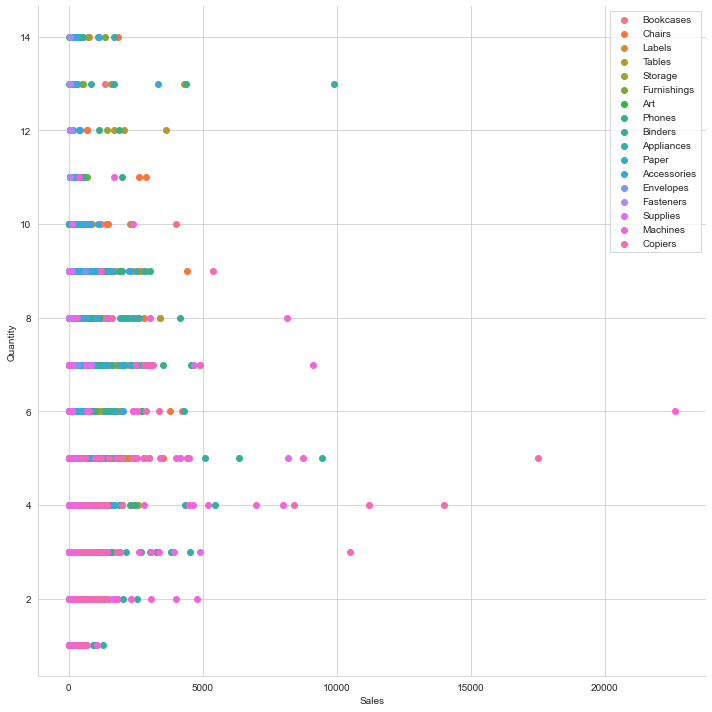

In [106]:
sns.set_style("whitegrid") 
sns.FacetGrid(df, hue ="Sub-Category",height = 10).map(plt.scatter,'Sales','Quantity')
plt.legend()
plt.show()

### 10.Correlation

In [164]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [171]:
df.corr()['Profit'].sort_values(ascending= False)

Profit      1.000000
Sales       0.479064
Quantity    0.066253
Discount   -0.219487
Name: Profit, dtype: float64

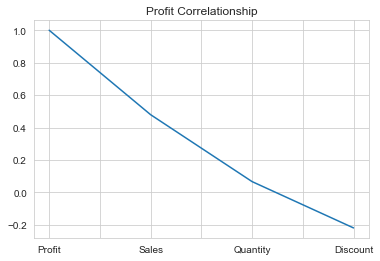

In [173]:
df.corr()['Profit'].sort_values(ascending= False).plot()
plt.title('Profit Correlationship')
plt.show()

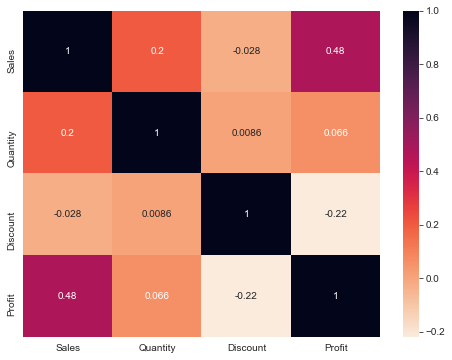

In [169]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap = 'rocket_r', annot=True)
plt.show()

### CONCLUSION

#### 1.Top 3 State where Profit are Highest:-
    
1)Vermont

2)Rhode Island 

3)Indiana

#### 2.Top 3 city where Profit are Highest:-
    
1)Jamestown

2)Independence 

3)Lafayette

#### 3.Top 3 State where Profit are Lowest:-

1)Ohio

2)Colorado 

3)North Carolina		

#### 4.Top 3 City where Profit are Lowest:-

1)Bethlehem

2)Champaign 

3)Oswego	

#### 5.Category:
1) High Profit --> Technology 

2) Low Profit --> Furniture

#### 6.Sub- Category:
1) High Profit --> Copier

2)Low Profit --> Machines

2) HIgh Sales--> Copier

3) HIgh Discount --> Binders , Machines and then tables

#### 7.Segment:

1)High Profit & Sales --> Home-office

#### 8.Sales:

1) Highest amount of sales --> Wyoming

2) Lowest Amount of Sales --> South Dakota

#### Correlations:

Sales and Profit are Positivily Correlated.

Discount and Profit are Negatively Correlated

Quantity and Profit are less Moderately Correlated.
